In [1]:
#doing all relevant imports

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob


In [4]:
# # CAMERA CALIBRATION

# # prepare object points
# nx = 9 # enter number chessboard corners, x-dir (chessboard dims-1)
# ny = 6 # enter number chessboard corners, y-dir (chessboard dims-1)

# # read in and make a list of calibration images
# # images 1, 4, and 5 do not meet 9*6 criteria
# images = glob.glob('./camera_cal/calibration*.jpg')

# # arrays to store object and image points from all images
# objpoints = [] # 3D points in real world space
# imgpoints = [] # 2D points in image plane

# # prepare object points, like (0,0,0), (1,0,0), (2,0,0), ...., (9,5,0)
# objp = np.zeros((nx*ny,3), np.float32)
# objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# # collect matrix and distortion coeffs from all image calibrations
# mtx_cc = []
# dist_cc = []
# me_cc = []
# sic_ct = 1

# for fname in images:

#     print(fname)
#     img = cv2.imread(fname)  
#     img_cc = np.copy(img)
#     img_ut = np.copy(img)    

#     # convert to grayscale
#     gray = cv2.cvtColor(img_cc, cv2.COLOR_BGR2GRAY)
    
#     # findchessboard corners
#     ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

#     # camera calibration
#     # if found, draw corners
#     if ret == True:
        
#         # draw and display corners
#         cv2.drawChessboardCorners(img_cc, (nx, ny), corners, ret)
                
#         imgpoints.append(corners)
#         objpoints.append(objp)
        
#         # camera calibration, given object points, image points, and the shape of the grayscale image:    
#         ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
        
#         mean_error = 0
#         for i in range(len(objpoints)):
#             imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
#             error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
#             mean_error += error        

#         mtx_cc.append(mtx)
#         dist_cc.append(dist)
#         me_cc.append(mean_error)

#         # undistort test image
#         dst = cv2.undistort(img_cc, mtx, dist, None, mtx)
        
#         # display image
#         fig = plt.figure()
#         fig.set_size_inches(18.5, 10.5)
#         ax1 = fig.add_subplot(1,2,1)
#         ax1.imshow(img)
#         ax2 = fig.add_subplot(1,2,2)
#         ax2.imshow(dst)

#         plt.show()

#         # undistort and transform        
#         # use OpenCV undistort() function to remove distortion
#         undist = cv2.undistort(img_ut, mtx, dist, None, mtx)
#         # Convert undistorted image to grayscale
#         gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
        
#         # search for corners in the grayscaled image
#         ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

#         # if found, draw corners
#         if ret == True:

#             # if found corners, draw them
#             cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
            
#             # choose offset from image corners to plot detected corners
#             # this should be chosen to present result at proper aspect ratio
#             # choice of 100 pixels is not exact, but close enough for our purpose here
#             offset = 100 # offset for dst points
#             # Grab the image shape
#             img_size = (gray.shape[1], gray.shape[0])

#             # For source points I'm grabbing the outer four detected corners
#             src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
            
#             # For destination points, I'm arbitrarily choosing some points to be
#             # a nice fit for displaying our warped result 
#             # again, not exact, but close enough for our purposes
#             dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
#                                          [img_size[0]-offset, img_size[1]-offset], 
#                                          [offset, img_size[1]-offset]])
            
#             # given src and dst points, calculate the perspective transform matrix
#             M = cv2.getPerspectiveTransform(src, dst)
#             # warp the image using OpenCV warpPerspective()
#             warped = cv2.warpPerspective(undist, M, img_size)            

#             # display image
#             fig = plt.figure()
#             fig.set_size_inches(18.5, 10.5)
#             ax1 = fig.add_subplot(1,2,1)
#             ax1.imshow(img)
#             ax2 = fig.add_subplot(1,2,2)
#             ax2.imshow(warped)

#             plt.show()
            
#             sic_ct += 1
    

# # print(type(mtx))
# # print(mtx)
# # print('camera matrix:'+str(mtx))
# # print(type(dist))
# # print('distortion coefficeints:'+str(dist))
# # print('mean error vector:'+str(me_cc))

In [462]:
# function: UNDISTORT FRAME

# APPLY CAMERA MATRIX and 
# DISTORTION COEFFICIENTS
# to UNDISTORT EACH FRAME

def frame_ud(img_fn):
    # img_fn: image file name
    cf_img = mpimg.imread(img_fn)
    orig_img = np.copy(cf_img)

    # camera matrix and distortion coefficients
    # values from running previous cell on images from "camera_cal" folder
    # camera matrix
    p_cmtx = np.asarray([[1.15777829e+03, 0.00000000e+00, 6.67113866e+02],
             [0.00000000e+00, 1.15282230e+03, 3.86124658e+02],
             [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
    # distortion coefficeints
    p_cdist = np.asarray([[-0.24688572, -0.02372824, -0.00109832,  0.00035104, -0.00260433]])

    # undistort
    # use OpenCV undistort() function to remove distortion
    undist_img = cv2.undistort(cf_img, p_cmtx, p_cdist, None, p_cmtx)
    
    # return result    
    return orig_img, undist_img


In [463]:
# function: COLOR SELECTION

# HLS (alternate options: HSV, color channels, etc)
# define function that thresholds S-channel of HLS
def hls_select(orig_img, thresh=(0, 255)):
    hls = cv2.cvtColor(orig_img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1
    
    # return result    
    return binary_output

In [464]:
# function: GRADIENT THRESHOLD

# function inputs: image, gradient orientation, threshold bounds
def grad_thresh(orig_img, orient='x', sobel_kernel=3, thresh=(0,255)):

    thresh_min = thresh[0]
    thresh_max = thresh[1]
    
    # convert to HLS color space and separate channels
    hls = cv2.cvtColor(orig_img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    channel_in = l_channel
    
    # apply x or y gradient with the OpenCV Sobel() function
    # and take absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(channel_in, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(channel_in, cv2.CV_64F, 0, 1))
    # rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # create a copy and apply threshold
    binary_output = np.zeros_like(scaled_sobel)
    # inclusive (>=, <=) thresholds, (exclusive ok too)
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # return result
    return binary_output

In [465]:
# function: GRADIENT MAGNITUDE THRESHOLD

# function inputs: image, kernel size, threshold magnitude bounds
def mag_thresh(orig_img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # convert to HLS color space and separate channels
    hls = cv2.cvtColor(orig_img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    channel_in = l_channel
    
    # take Sobel x and y gradients
    sobelx = cv2.Sobel(channel_in, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(channel_in, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # calculate gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # create binary of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # return result
    return binary_output

In [466]:
# function: GRADIENT DIRECTION THRESHOLD

# function inputs: image, kernel size, threshold direction bounds
def dir_threshold(orig_img, sobel_kernel=3, thresh=(0, np.pi/2)):

    # convert to HLS color space and separate channels
    hls = cv2.cvtColor(orig_img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    channel_in = l_channel
    
    # calculate x and y gradients
    sobelx = cv2.Sobel(channel_in, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(channel_in, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # take absolute value of gradients,
    # calculate gradient direction
    # apply gradient direction thresholds, and create binary image output
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # return binary image
    return binary_output

In [467]:

# function: MASKING, PERSPECTIVE TARNSFORM, WARPING

# function inputs: image, kernel size, threshold direction bounds
def frame_mptw(gmd_comb, mask_cords):

    # image size
    ysize = gmd_comb.shape[0]
    xsize = gmd_comb.shape[1]
    # make a copy of the image
    gmd_mask = np.copy(gmd_comb)
    gmd_mask = np.dstack((gmd_mask, gmd_mask, gmd_mask))*255

    # define a region of interest
    # origin (x=0, y=0) at upper left
    mask_cords = np.round(mask_cords)
    mask_cords = mask_cords.astype(int)
    mask_cords = tuple(map(tuple,mask_cords))

    # draw lines with thickness of 4 px
    ic = 1

    gmd_mask = cv2.line(gmd_mask,mask_cords[ic-1],mask_cords[ic],(255,0,0),4)
    while (ic<len(mask_cords)):
        gmd_mask = cv2.line(gmd_mask,mask_cords[ic-1],mask_cords[ic],(255,0,0),4)
        ic = ic+1

    gmd_mask = cv2.line(gmd_mask,mask_cords[-1],mask_cords[0],(255,0,0),4)

    # choose offset from image corners to plot detected corners
    # this should be chosen to present result at proper aspect ratio
    # choice of ? pixels is not exact, but close enough for our purpose here
    offset = 75 # offset for dst points

    # image shape
    img_size = (xsize, ysize)

    # source points
    src = np.float32(mask_cords)

    # destination points, arbitrarily choose some points 
    # to be a nice fit for displaying our warped result 
    # not exact, but close enough

    # tested choice of destination points
    # pick destination points such that t
    # mask encompasses close enough to (70-85)% of image size
    # a low width on x-axis will
    # raise false pixel counts and mislead sliding window algorithm
    # a high width (close to image size) on x-axis will
    # push lane lines out of image boundary

    dst = np.float32([[offset, img_size[1]-offset], [offset, offset], [img_size[0]-offset, offset], 
                                             [img_size[0]-offset, img_size[1]-offset]])

#     # this will result x-cords from  
#     # (bottom left) and (bottom right) from trapezoidal mask
#     dst = np.float32([[mask_cords[0][0], img_size[1]-offset], [mask_cords[0][0], offset], 
#                       [mask_cords[3][0], offset], [mask_cords[3][0], img_size[1]-offset]])

#     # this will result in average of x-cords from
#     # (top and bottom left) and (top and bottom right) from trapezoidal mask
#     dst = np.float32([[(mask_cords[0][0]+mask_cords[1][0])/2, img_size[1]-offset], [(mask_cords[0][0]+mask_cords[1][0])/2, offset], 
#                       [(mask_cords[2][0]+mask_cords[3][0])/2, offset], [(mask_cords[2][0]+mask_cords[3][0])/2, img_size[1]-offset]])

    # given src and dst points, calculate perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    PTM = M
    # warp image using OpenCV warpPerspective()
    warped_img = cv2.warpPerspective(gmd_comb, M, img_size)
    # store warped image binary with no depth, for histogram peaks
    warped_nod = np.copy(warped_img) 
    warped_img = np.dstack((warped_img, warped_img, warped_img))*255
    
    # destination points for plotting mask on warped image
    mask_cords2 = [(dst[0][0], (ysize-3)),
                (dst[0][0], 3),
                (dst[3][0], 3),
                (dst[3][0], (ysize-3))]

    mask_cords2 = np.round(mask_cords2)
    mask_cords2 = mask_cords2.astype(int)
    mask_cords2 = tuple(map(tuple,mask_cords2))

    # draw lines with thickness of 4 px
    ic = 1
    warped_img = cv2.line(warped_img,mask_cords2[ic-1],mask_cords2[ic],(255,0,0),4)

    while (ic<len(mask_cords2)):
        warped_img = cv2.line(warped_img,mask_cords2[ic-1],mask_cords2[ic],(255,0,0),4)
        ic = ic+1

    warped_img = cv2.line(warped_img,mask_cords2[-1],mask_cords2[0],(255,0,0),4)
    
    return gmd_mask, warped_img, warped_nod, PTM


In [468]:
# function: 
# FIND LANES STARTING COORDINATES ON X-AXIS 
# by HISTOGRAM PEAKS OF WARPED BINARY OUTPUT
def wi_hp(warped_nod):
    # select only bottom half of image
    # lane lines are likely to be mostly vertical nearest to car
    bottom_half = warped_nod[warped_nod.shape[0]//2:,:]

    # sum across image pixels vertically - make sure to set an `axis`
    # i.e. the highest areas of vertical lines should be larger values
    wi_hp_out = np.sum(bottom_half, axis=0)
    
    return wi_hp_out


In [469]:
# function: FIND LANE PIXELS by SLIDING WINDOWS ALGORITHM
def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    flp_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(flp_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(flp_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, flp_img


In [470]:
# function: to IMPLEMEMT 2nd DEGREE POLYNOMIAL FIT,
# post SLIDING WINDOWS ALGORITHM
def fit_polynomial(warped_nod):
    
    binary_warped = warped_nod
    
    # Find lane pixels first
    leftx, lefty, rightx, righty, flp_img = find_lane_pixels(binary_warped)
    fp_img = np.copy(flp_img)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

        # ideal equations for straight lanes (polynomial degree of 1)
        # however to maintain clean and consitent code 
        # curve-fit for straight lanes will also use (polynomial degree of 1)
        # left_fitx = left_fit[0]*ploty + left_fit[1]
        # right_fitx = right_fit[0]*ploty + right_fit[1]

    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    fp_img[lefty, leftx] = [255, 0, 0]
    fp_img[righty, rightx] = [0, 0, 255]
    
    # Recast x and y points into usable format for cv2.polylines()
    left_pts = np.vstack((left_fitx,ploty)).astype(np.int32).T
    right_pts = np.vstack((right_fitx,ploty)).astype(np.int32).T    

    # Draw left and right lanes onto warped image
    cv2.polylines(fp_img,  [left_pts],  False,  (255, 255, 0),  4)
    cv2.polylines(fp_img,  [right_pts],  False,  (255, 255, 0),  4)    
    
    return fp_img, left_fit, right_fit, ploty, left_fitx, right_fitx


In [471]:
# function: fit_poly similar to fit_polynomial
# used in tolerance search instead of sliding window search
def fit_poly(img_shape, leftx, lefty, rightx, righty):
     ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # ideal equations for straight lanes (polynomial degree of 1)
    # however to maintain clean and consitent code 
    # curve-fit for straight lanes will also use (polynomial degree of 1)
    # left_fitx = left_fit[0]*ploty + left_fit[1]
    # right_fitx = right_fit[0]*ploty + right_fit[1]
    
    return left_fitx, right_fitx, ploty


In [472]:
# function: TOLERANCE/BAND SEARCH on FUTURE FRAMES
# post SLIDING WINDOWS ALGORITHM

def search_around_poly(binary_warped, left_fit, right_fit):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))

    # ideal equations for straight lanes (polynomial degree of 1)
    # however to maintain clean and consitent code 
    # curve-fit for straight lanes will also use (polynomial degree of 1)  
    # left_lane_inds = ((nonzerox > (left_fit[0]*nonzeroy + 
    #                left_fit[1] - margin)) & (nonzerox < ( 
    #                left_fit[0]*nonzeroy + left_fit[1] + margin)))
    # right_lane_inds = ((nonzerox > (right_fit[0]*nonzeroy + 
    #                right_fit[1] - margin)) & (nonzerox < ( 
    #                right_fit[0]*nonzeroy + right_fit[1] + margin)))
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

    # Recast the x and y points into usable format for cv2.polylines()
    left_pts = np.vstack((left_fitx,ploty)).astype(np.int32).T
    right_pts = np.vstack((right_fitx,ploty)).astype(np.int32).T    
    
    # Draw left and right lanes onto warped image
    cv2.polylines(result,  [left_pts],  False,  (255, 255, 0),  4)
    cv2.polylines(result,  [right_pts],  False,  (255, 255, 0),  4)    
        
    return result


In [473]:
# function: CALCULATE LANE RADIUS of CURVATURE (in pixel world)
# in PIXELS for LEFT and RIGHT LANES
def measure_curvature_pixels(left_fit, right_fit, ploty):
    '''
    Calculates the curvature of polynomial functions in pixels.
    '''
    
    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    # Calculation of R_curve (radius of curvature)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    
    return left_curverad, right_curverad


In [474]:
# function: CALCULATE LANE RADIUS of CURVATURE (in real world)
# in METERS for LEFT and RIGHT LANES
def measure_curvature_real(left_fitx, right_fitx, ploty, fp_img):
    
    diff_fitx = abs(left_fitx[-1]-right_fitx[-1])

    # from Measuring Curvature II
    # lane is about 30 meters long and 3.7 meters wide. 
    # Or, if you prefer to derive a conversion from pixel space to world space in your own images, 
    # compare your images with U.S. regulations that require a minimum lane width of 12 feet or 3.7 meters, 
    # and the dashed lane lines are 10 feet or 3 meters long each.

    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/diff_fitx # meters per pixel in x dimension

    # Fit a second order polynomial to pixel positions in each fake lane line
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)

    # Define y-value where we want radius of curvature
    # We'll choose the maximum y-value, corresponding to the bottom of the image
    y_eval = np.max(ploty)
    
    # Calculation of R_curve (radius of curvature)
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    center_curverad = np.min([left_curverad, right_curverad])+abs(left_curverad-right_curverad)/2
    
    # image size
    ysize_m = (fp_img.shape[0])*xm_per_pix
    xsize_m = (fp_img.shape[1])*xm_per_pix
    
    veh_pos = (left_fitx[-1])*xm_per_pix+(diff_fitx*xm_per_pix)/2
    lc_offset = (xsize_m/2-veh_pos)
    if (lc_offset<0):
        vp_lr = 'Vehicle is '+"{:.3f}".format(abs(lc_offset))+'m right of center'
    elif(lc_offset>0):
        vp_lr = 'Vehicle is '+"{:.3f}".format(abs(lc_offset))+'m left of center'
    else:
        vp_lr = 'Vehicle is at center'
    
    return left_curverad, right_curverad, lc_offset, center_curverad, vp_lr


In [475]:
# function: MAP DETECTED LANE on to UNIDISTORTED IMAGE
def map_lane_udi(undist_img, warped_nod, M, left_fitx, right_fitx, ploty):
    # Create an image to draw lines on
    warp_zero = np.zeros_like(warped_nod).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

#     # Recast the x and y points into usable format for cv2.polylines()
#     left_pts = np.vstack((left_fitx,ploty)).astype(np.int32).T
#     right_pts = np.vstack((right_fitx,ploty)).astype(np.int32).T    
    
#     # Draw left and right lanes onto warped image
#     cv2.polylines(color_warp,  [left_pts],  False,  (255, 0, 0),  20)
#     cv2.polylines(color_warp,  [right_pts],  False,  (0, 0, 255),  20)
    
    # inverse perspective matrix (Minv)
    Minv = np.linalg.inv(M)

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (xsize, ysize)) 
    # Combine the result with the original image
    ff_result = cv2.addWeighted(undist_img, 1, newwarp, 0.3, 0)
    
    return ff_result



Left_CurvRad (pix): 991.7478794416633
Right_CurvRad (pix): 1081.3782352639437
Left_CurvRad (m): 459.77738066093303
Right_CurvRad (m): 403.40458309695026
Lane_CurvRad (m): 431.59098187894165
Lane Offset (m): -0.11897318631184861
Vehicle Position (m): Vehicle is 0.119m right of center


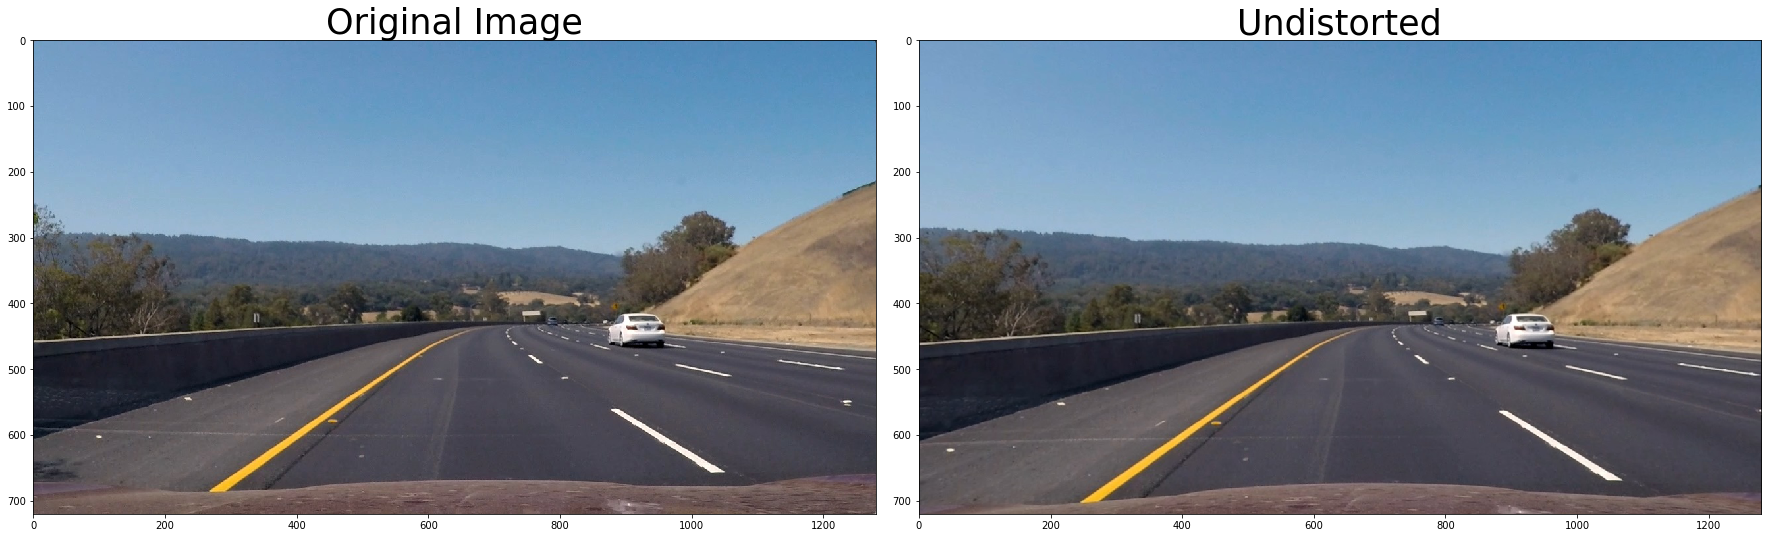

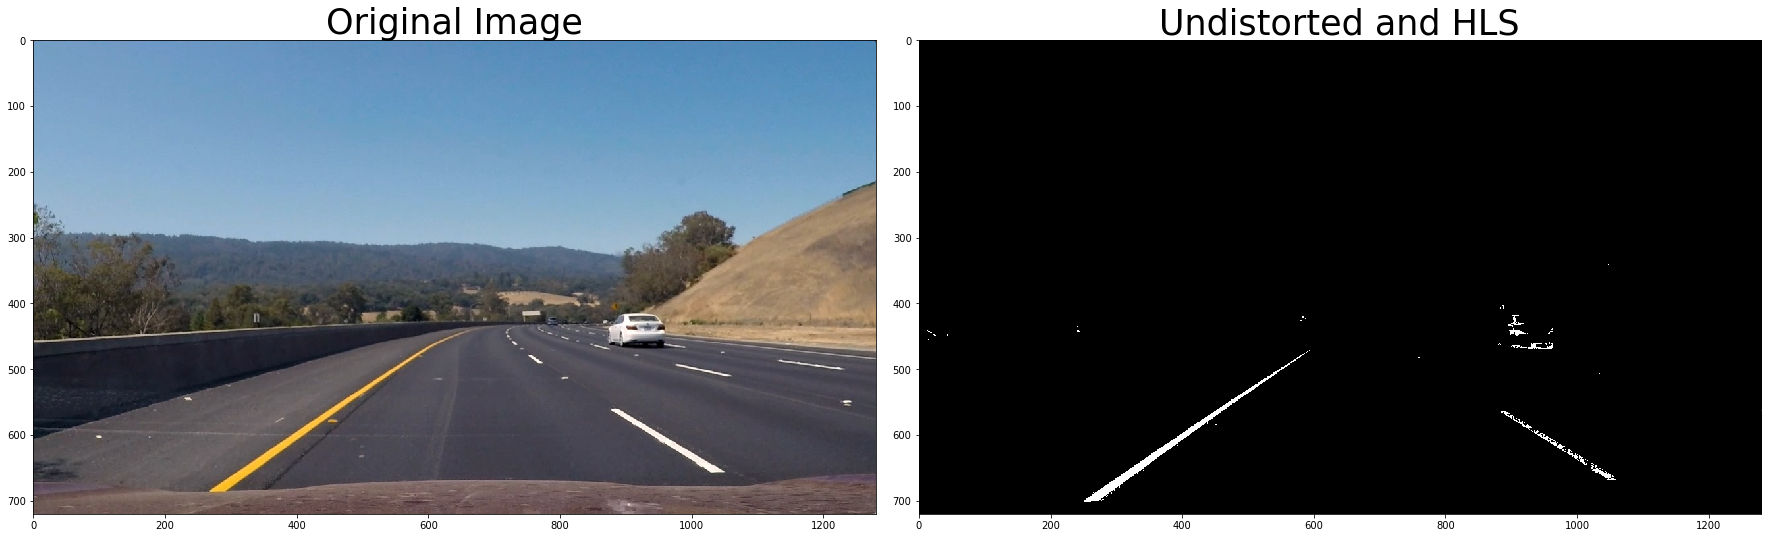

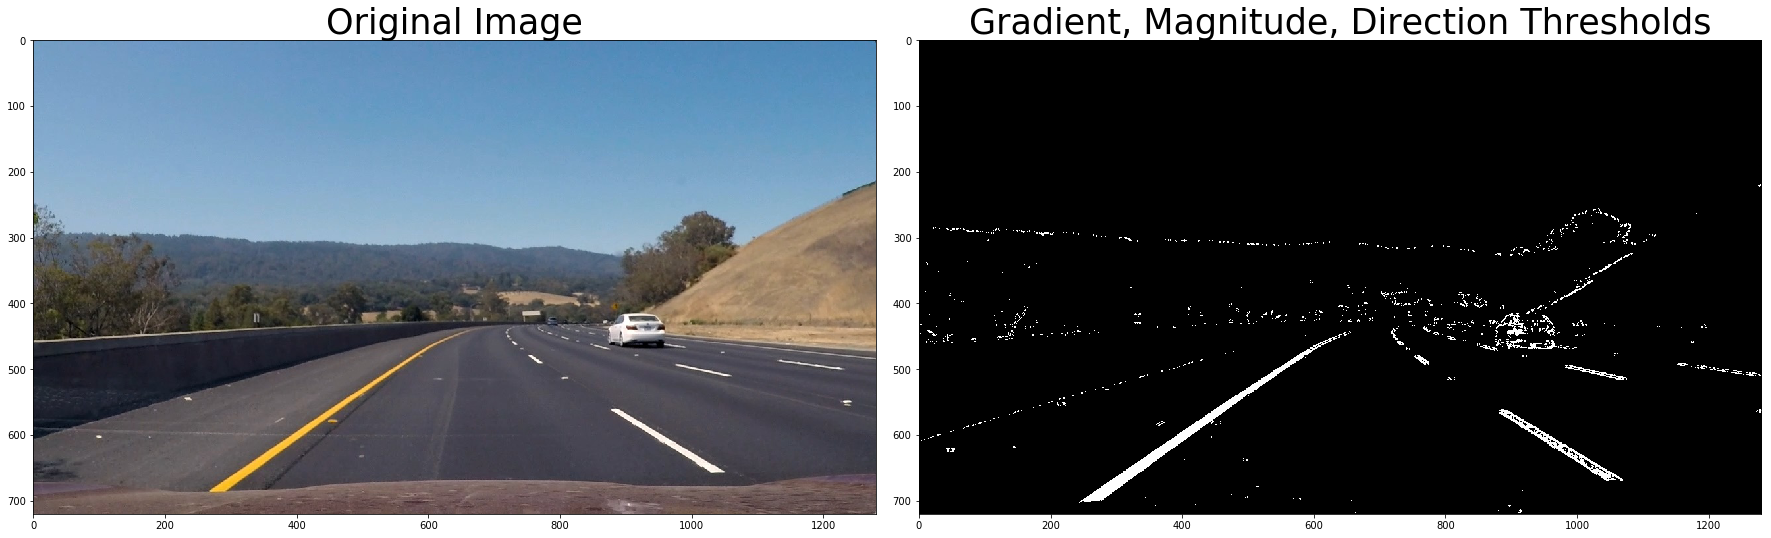

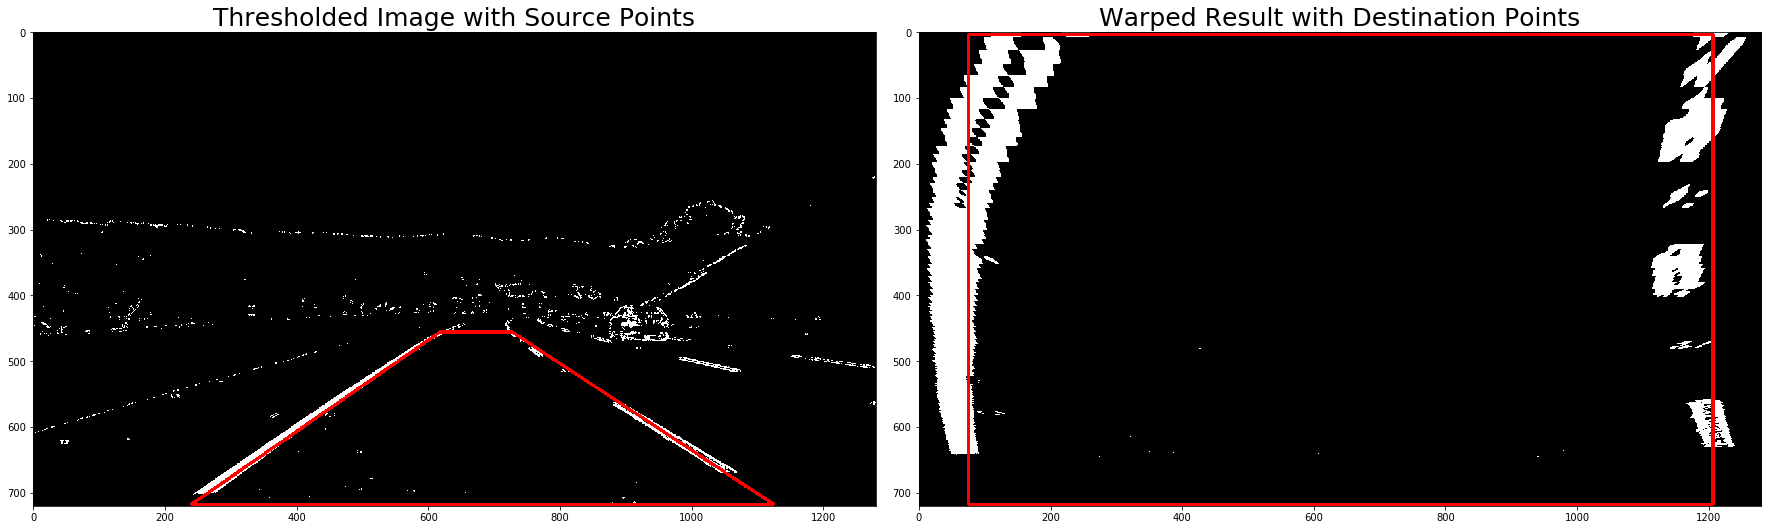

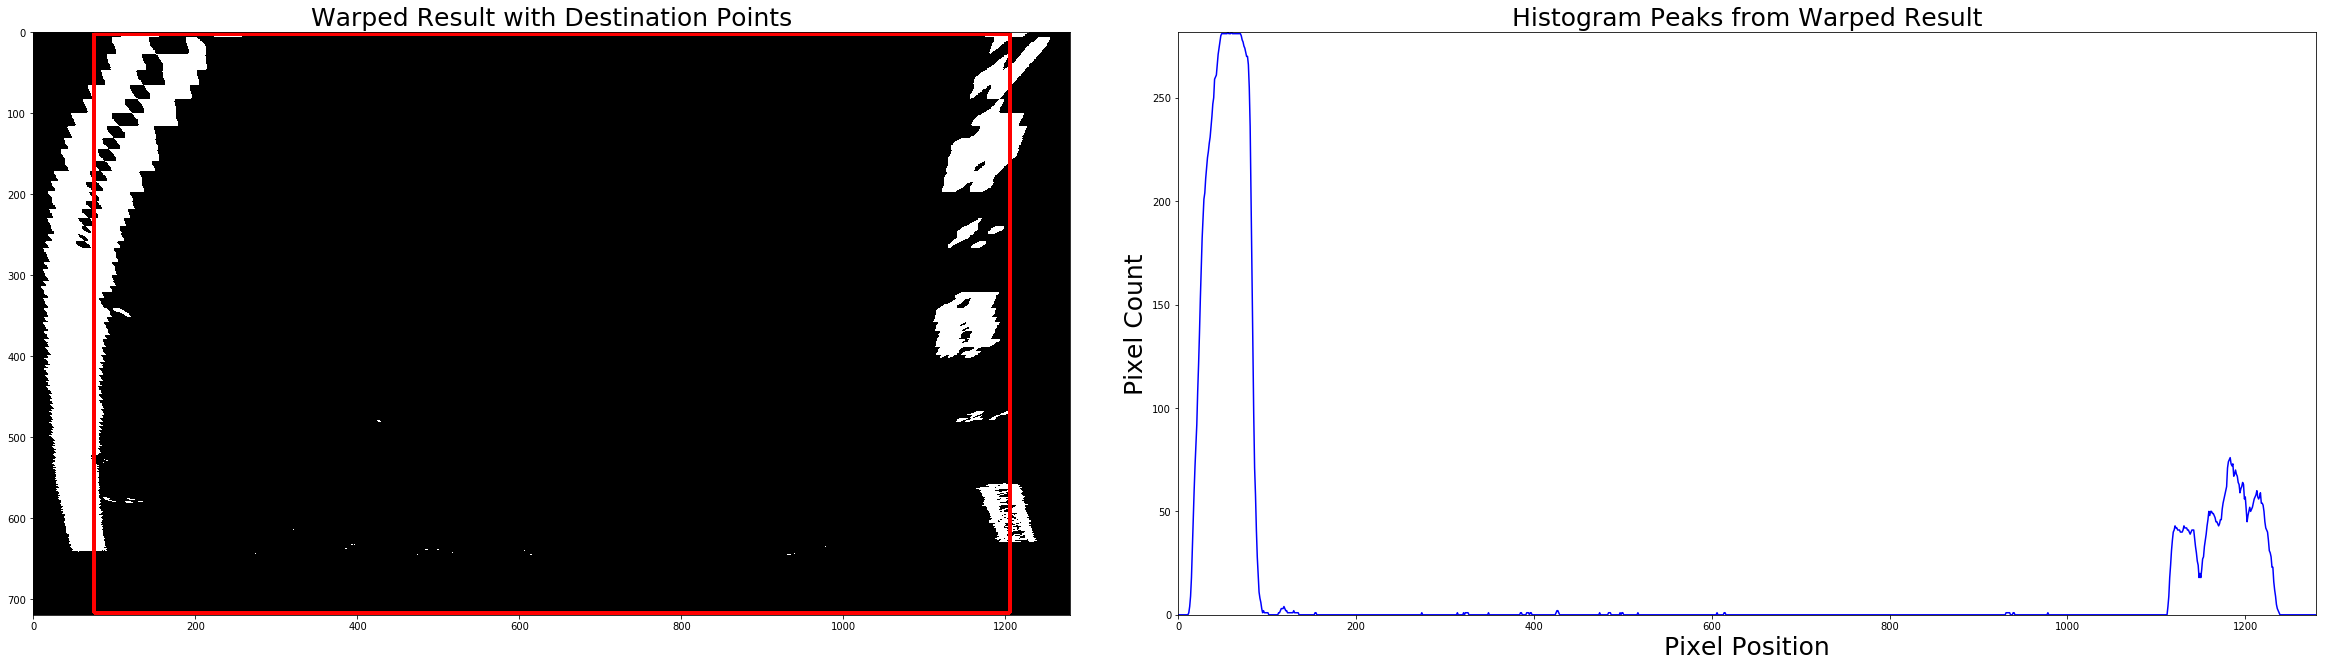

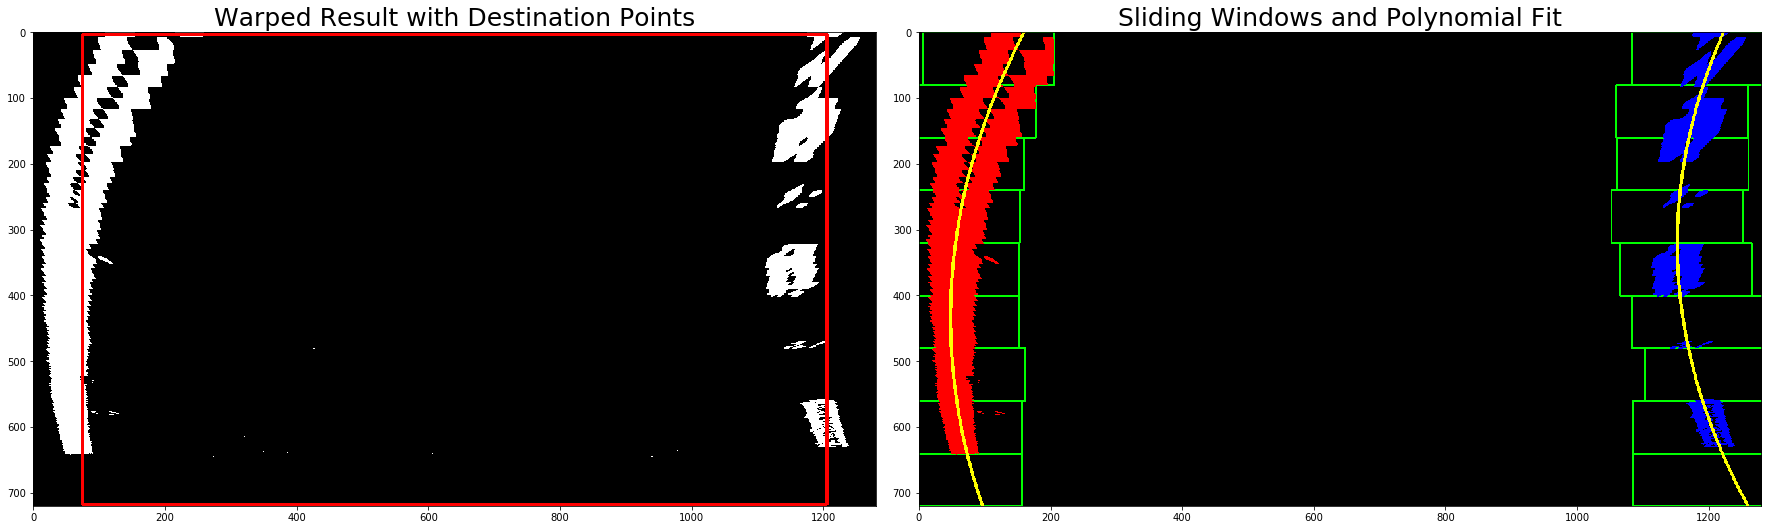

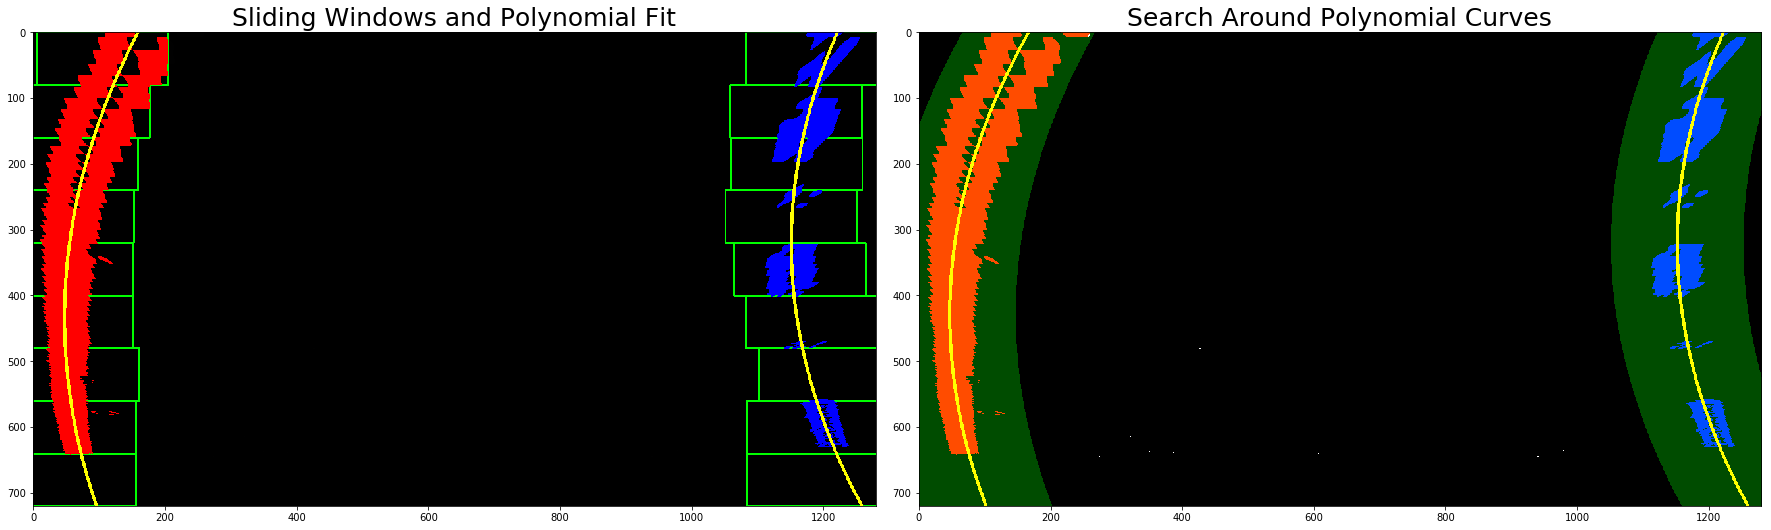

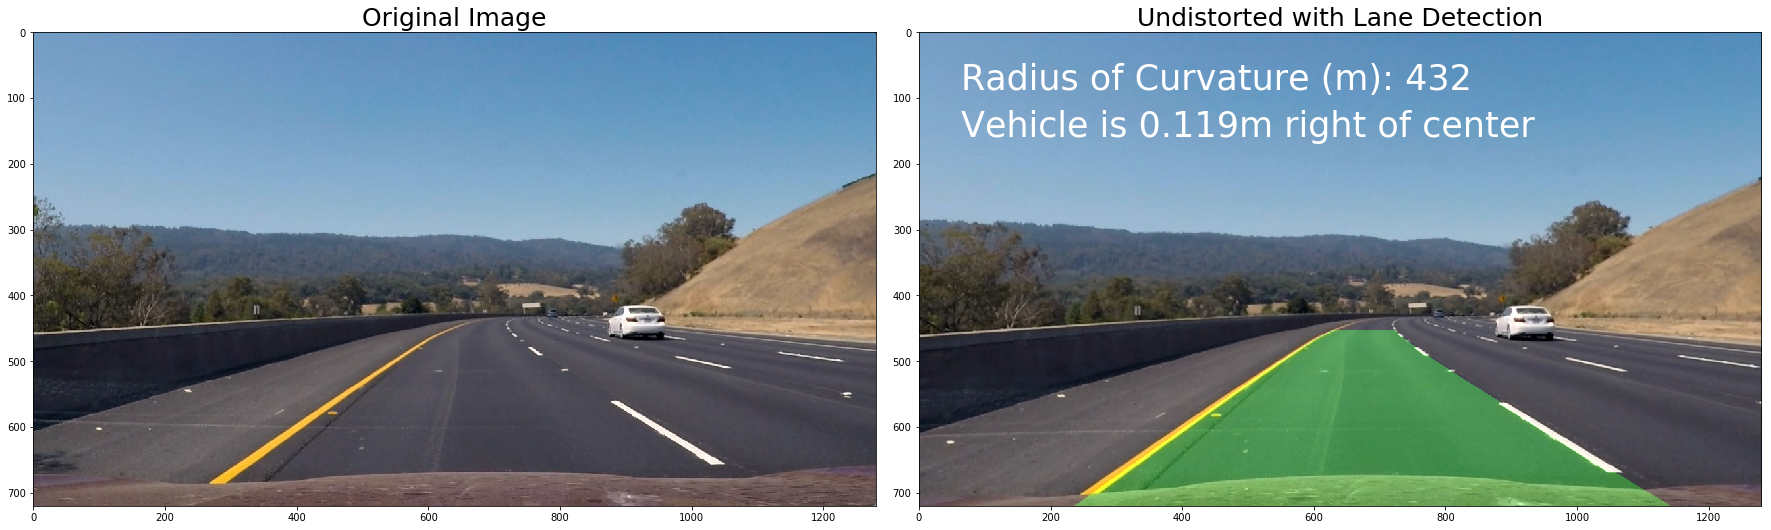

In [476]:
# MAIN

# image file name
img_fn = './test_images/test1.jpg'
img_fn = './test_images/test2.jpg'
img_fn = './test_images/test3.jpg'
# img_fn = './test_images/test4.jpg'
# img_fn = './test_images/test5.jpg'
# img_fn = './test_images/test6.jpg'
# img_fn = './test_images/straight_lines1.jpg'
# img_fn = './test_images/straight_lines2.jpg'

# function to UNDISTORT FRAME
orig_img, undist_img = frame_ud(img_fn)

# plot result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(orig_img)
ax1.set_title('Original Image', fontsize=35)
ax2.imshow(undist_img)
ax2.set_title('Undistorted', fontsize=35)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
# plt.savefig('./test_images/Test3_Undistorted.jpg')

# function to apply COLOR SELECTION
hls_binary = hls_select(undist_img, thresh=(175, 255))

# plot result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(orig_img)
ax1.set_title('Original Image', fontsize=35)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Undistorted and HLS', fontsize=35)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
# plt.savefig('./test_images/Test3_HLSBinary.jpg')

# functions to apply GRADIENT, MAGNITUDE, DIRECTION THRESHOLDS
# Sobel kernel size
ksize = 7 # choose higher odd number to smooth gradient measurements

# function to apply gradient thresholds
gradx = grad_thresh(undist_img, orient='x', sobel_kernel=ksize, thresh=(25, 200))
grady = grad_thresh(undist_img, orient='y', sobel_kernel=ksize, thresh=(25, 200))
# function to apply magnitude thresholds
mag_binary = mag_thresh(undist_img, sobel_kernel=ksize, mag_thresh=(150, 255))
# function to apply direction thresholds
dir_binary = dir_threshold(undist_img, sobel_kernel=ksize, thresh=(0.25, 1.5))

gmd_comb = np.zeros_like(dir_binary)
gmd_comb[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1)) | (hls_binary == 1)] = 1
gmd_comb = gmd_comb.astype(np.uint8)

# plot result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(orig_img)
ax1.set_title('Original Image', fontsize=35)
ax2.imshow(gmd_comb, cmap='gray')
ax2.set_title('Gradient, Magnitude, Direction Thresholds', fontsize=35)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
# plt.savefig('./test_images/Test3_GMDBinary.jpg')

# function to apply: MASKING, PERSPECTIVE TARNSFORM, WARPING
# image size
ysize = gmd_comb.shape[0]
xsize = gmd_comb.shape[1]

# obtain these coordinates using WebPlotDigitizer at https://apps.automeris.io/wpd/
# test1.jpg
mask_cords = [(240, (ysize-3)),
            (615.5, 446.3),
            (718.18, 446.3),
            (1145, (ysize-3))]

# test2.jpg
mask_cords = [(300, (ysize-3)),
            (567.742, 465.587),
            (711.29, 465.587),
            (1161.29, (ysize-3))]

# test3.jpg
mask_cords = [(240.32, (ysize-3)),
            (617.742, 455.48),
            (727.42, 455.48),
            (1124.2, (ysize-3))]

# # test4.jpg
# mask_cords = [(266.6, (ysize-3)),
#             (616.3, 448.8),
#             (717.8, 448.8),
#             (1180.2, (ysize-3))]

# # test5.jpg
# mask_cords = [(174, (ysize-3)),
#             (590.81, 457.2),
#             (727, 457.2),
#             (1122.7, (ysize-3))]

# # test6.jpg
# mask_cords = [(264.5, (ysize-3)),
#             (625.8, 450.6),
#             (724.2, 450.6),
#             (1156.45, (ysize-3))]

# # straight_lines1.jpg
# mask_cords = [(208.086, (ysize-3)),
#             (594.61, 450),
#             (686.79, 450),
#             (1097.57, (ysize-3))]

# # straight_lines2.jpg
# mask_cords = [(214.086, (ysize-3)),
#             (594.61, 450),
#             (686.79, 450),
#             (1102.57, (ysize-3))]

# function to apply: MASKING, PERSPECTIVE TARNSFORM, WARPING
gmd_mask, warped_img, warped_nod, PTM = frame_mptw(gmd_comb, mask_cords)

# plot result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(gmd_mask, cmap='gray')
ax1.set_title('Thresholded Image with Source Points', fontsize=25)
ax2.imshow(warped_img, cmap='gray')
ax2.set_title('Warped Result with Destination Points', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)    
# plt.savefig('./test_images/Test3_MPTBinary.jpg')

# function to 
# FIND LANES STARTING COORDINATES ON X-AXIS 
# by HISTOGRAM PEAKS OF WARPED BINARY OUTPUT
wi_hp_out = wi_hp(warped_nod)

# plot result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(warped_img, cmap='gray')
ax1.set_title('Warped Result with Destination Points', fontsize=25)
ax2.plot(wi_hp_out,'b')
ax2.autoscale(enable=True, axis='x', tight=True)
ax2.autoscale(enable=True, axis='y', tight=True)
ax2.set_xlabel('Pixel Position', fontsize=25)
ax2.set_ylabel('Pixel Count', fontsize=25)
ax2.set_title('Histogram Peaks from Warped Result', fontsize=25)
plt.subplots_adjust(left=-0.35, right=1, top=0.9, bottom=0.)
plt.savefig('./test_images/Test3_HPeaks.jpg',bbox_inches = 'tight')

# function: to IMPLEMEMT 2nd DEGREE POLYNOMIAL FIT, post SLIDING WINDOWS ALGORITHM
fp_img, left_fit, right_fit, ploty, left_fitx, right_fitx = fit_polynomial(warped_nod)

# plot result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(warped_img, cmap='gray')
ax1.set_title('Warped Result with Destination Points', fontsize=25)
ax2.imshow(fp_img)
ax2.set_title('Sliding Windows and Polynomial Fit', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
# plt.savefig('./test_images/Test3_SWPF.jpg')

# function: TOLERANCE/BAND SEARCH on FUTURE FRAMES
# post SLIDING WINDOWS ALGORITHM

# Polynomial fit values from the previous frame
left_fit = np.array(left_fit)
right_fit = np.array(right_fit)

sap_img = search_around_poly(warped_nod, left_fit, right_fit)

# plot result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(fp_img)
ax1.set_title('Sliding Windows and Polynomial Fit', fontsize=25)
ax2.imshow(sap_img)
ax2.set_title('Search Around Polynomial Curves', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
# plt.savefig('./test_images/Test3_SAPC.jpg')

# function: CALCULATE RADIUS of CURVATURE in PIXELS for LEFT and RIGHT LANES
left_curverad_pix, right_curverad_pix = measure_curvature_pixels(left_fit, right_fit, ploty)
print('Left_CurvRad (pix):', left_curverad_pix)
print('Right_CurvRad (pix):', right_curverad_pix)

# function: CALCULATE RADIUS of CURVATURE in METERS for LEFT and RIGHT LANES
left_curverad_m, right_curverad_m, lc_offset_m, center_curverad_m, vp_lr_m = \
                                            measure_curvature_real(left_fitx, right_fitx, ploty, fp_img)
print('Left_CurvRad (m):', left_curverad_m)
print('Right_CurvRad (m):', right_curverad_m)
print('Lane_CurvRad (m):', center_curverad_m)
print('Lane Offset (m):', lc_offset_m)
print('Vehicle Position (m):', vp_lr_m)

# function: MAP DETECTED LANE on to UNIDISTORTED IMAGE
ff_result = map_lane_udi(undist_img, warped_nod, PTM, left_fitx, right_fitx, ploty)

# plot result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(orig_img)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(ff_result)
ax2.set_title('Undistorted with Lane Detection', fontsize=25)
plt.text(0.05, 0.9,'Radius of Curvature (m): ''%.0f'%center_curverad_m, 
             ha='left', va='center', transform = ax2.transAxes, fontsize='35', color='w')
plt.text(0.05, 0.8, vp_lr_m, 
             ha='left', va='center', transform = ax2.transAxes, fontsize='35', color='w')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
# plt.savefig('./test_images/Test3_LDetect.jpg')